<a href="https://colab.research.google.com/github/kemaladamr/python_data_mining/blob/main/Collecting_exploring_and_visualizing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import sqlite3

In [2]:
sqlite_file = '/content/drive/MyDrive/Colab Notebooks/DATA-MINING-PACK/boston.db'

In [3]:
# connecting to the database file
conn = sqlite3.connect(sqlite_file)

In [4]:
# initialize a cursor object
cur = conn.cursor()

In [5]:
# define a traversing search
cur.execute("select * from boston limit 5;")

In [6]:
# fetch and print
data = cur.fetchall()
print(data)

[(0, 0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.09, 1.0, 296.0, 15.3, 396.9, 4.98, 24.0), (1, 0.02731, 0.0, 7.07, 0.0, 0.469, 6.421, 78.9, 4.9671, 2.0, 242.0, 17.8, 396.9, 9.14, 21.6), (2, 0.02729, 0.0, 7.07, 0.0, 0.469, 7.185, 61.1, 4.9671, 2.0, 242.0, 17.8, 392.83, 4.03, 34.7), (3, 0.03237, 0.0, 2.18, 0.0, 0.458, 6.998, 45.8, 6.0622, 3.0, 222.0, 18.7, 394.63, 2.94, 33.4), (4, 0.06905, 0.0, 2.18, 0.0, 0.458, 7.147, 54.2, 6.0622, 3.0, 222.0, 18.7, 396.9, 5.33, 36.2)]


In [7]:
cur.execute("select ZN from boston where ZN > 0.0;")
data = cur.fetchall()
print(data)

[(18.0,), (12.5,), (12.5,), (12.5,), (12.5,), (12.5,), (12.5,), (12.5,), (75.0,), (75.0,), (21.0,), (21.0,), (21.0,), (21.0,), (75.0,), (90.0,), (85.0,), (100.0,), (25.0,), (25.0,), (25.0,), (25.0,), (25.0,), (25.0,), (17.5,), (80.0,), (80.0,), (12.5,), (12.5,), (12.5,), (25.0,), (25.0,), (25.0,), (25.0,), (28.0,), (28.0,), (28.0,), (45.0,), (45.0,), (45.0,), (45.0,), (45.0,), (45.0,), (60.0,), (60.0,), (80.0,), (80.0,), (80.0,), (80.0,), (95.0,), (95.0,), (82.5,), (82.5,), (95.0,), (95.0,), (30.0,), (30.0,), (30.0,), (30.0,), (30.0,), (30.0,), (22.0,), (22.0,), (22.0,), (22.0,), (22.0,), (22.0,), (22.0,), (22.0,), (22.0,), (22.0,), (80.0,), (80.0,), (90.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (40.0,), (40.0,), (40.0,), (40.0,), (40.0,), (20.0,), (20.0,), (20.0,), (20.0,), (90.0,), (90.0,), (55.0,), (80.0,), (52.5,), (52.5,), (52.5,), (80.0,), (80.0,), (80.0,), (70.0,),

In [8]:
import pandas as pd
# get all data inside boston table limited to 5 rows
df = pd.read_sql_query("select * from boston limit 5;", conn)
print("df_shape = " + str(df.shape))

df_shape = (5, 15)


In [9]:
# get all data inside boston table
df = pd.read_sql_query("select * from boston;", conn)
print("df.shape = " + str(df.shape))
print("Sanity check with pandas head():")
print(df.head())
print("Summarize with pandas describe():")
print(df.describe().transpose())

df.shape = (506, 15)
Sanity check with pandas head():
   record     CRIM    ZN  INDUS  CHAS  ...    TAX  PTRATIO       B  LSTAT  MEDV
0       0  0.00632  18.0   2.31   0.0  ...  296.0     15.3  396.90   4.98  24.0
1       1  0.02731   0.0   7.07   0.0  ...  242.0     17.8  396.90   9.14  21.6
2       2  0.02729   0.0   7.07   0.0  ...  242.0     17.8  392.83   4.03  34.7
3       3  0.03237   0.0   2.18   0.0  ...  222.0     18.7  394.63   2.94  33.4
4       4  0.06905   0.0   2.18   0.0  ...  222.0     18.7  396.90   5.33  36.2

[5 rows x 15 columns]
Summarize with pandas describe():
         count        mean         std  ...        50%         75%       max
record   506.0  252.500000  146.213884  ...  252.50000  378.750000  505.0000
CRIM     506.0    3.593761    8.596783  ...    0.25651    3.647423   88.9762
ZN       506.0   11.363636   23.322453  ...    0.00000   12.500000  100.0000
INDUS    506.0   11.136779    6.860353  ...    9.69000   18.100000   27.7400
CHAS     506.0    0.0691

In [10]:
# get all data inside boston table that has ZN greater than 0
df = pd.read_sql_query("select * from boston where ZN > 0.0;", conn)
print("df.shape = " + str(df.shape))

df.shape = (134, 15)


In [11]:
# same as above with additional filtering in of records greater than 250
df = pd.read_sql_query("select * from boston where ZN > 0.0 and record > 250;", conn)
print("df.shape = " + str(df.shape))

df.shape = (66, 15)


In [12]:
# example of multiline search syntax
df = pd.read_sql_query(
    """ select record, ZN, AGE, TAX from boston
    where ZN > 0.0 and CRIM < 2.5;
    """,
    conn
)

In [13]:
# use pandas 'to_sql' method to commit changes to connection
df.to_sql("./data/boston_updated", conn, if_exists="replace")
# close connection
conn.close()

## Disks

In [14]:
# loading from file
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATA-MINING-PACK/iris.csv")

In [15]:
# make some changes
# create an index
df.index.name = "record"
# df['species'] = "new-species"
print(df.head())

        sepal length in cm  sepal width in cm  ...  petal width in cm  species
record                                         ...                            
0                      5.1                3.5  ...                0.2   setosa
1                      4.9                3.0  ...                0.2   setosa
2                      4.7                3.2  ...                0.2   setosa
3                      4.6                3.1  ...                0.2   setosa
4                      5.0                3.6  ...                0.2   setosa

[5 rows x 5 columns]


In [16]:
# save to file
df.to_csv("/content/drive/MyDrive/Colab Notebooks/DATA-MINING-PACK/iris.csv", index=True)

# From URLs

In [17]:
# load from web URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal length in cm', 'sepal width in cm', 'petal length in cm',
         'petal width in cm', 'species']

In [18]:
df = pd.read_csv(url, names=names)

In [19]:
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## From Scikit-learn and Seaborn-included sets

In [20]:
# load from wen scikit-learn
from sklearn.datasets import load_iris
dataset = load_iris()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['species'] = dataset.target

In [21]:
# load from seaborn
import seaborn as sns
df = sns.load_dataset("flights")

In [22]:
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


## Access, search, and sanity checks with pandas

In [23]:
sqlite_file = '/content/drive/MyDrive/Colab Notebooks/DATA-MINING-PACK/boston.db'

In [24]:
# Connecting to the database file
conn = sqlite3.connect(sqlite_file)

In [25]:
df = pd.read_sql_query("select * from boston;", conn)
print("df.shape = " + str(df.shape))
df.set_index("record", inplace=True)
conn.close()

df.shape = (506, 15)


In [26]:
# print first 5 rows with column names
print(df.head())

           CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
record                                     ...                                     
0       0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1       0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2       0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3       0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4       0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33  36.2

[5 rows x 14 columns]


In [27]:
# get amount of rows and columns
print(df.shape)
# get columns in the dataframe
print(df.columns)


(506, 14)
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [28]:
# get statistical summary
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [29]:
# view in transposed form
print(df.describe().transpose())

         count        mean         std  ...        50%         75%       max
CRIM     506.0    3.593761    8.596783  ...    0.25651    3.647423   88.9762
ZN       506.0   11.363636   23.322453  ...    0.00000   12.500000  100.0000
INDUS    506.0   11.136779    6.860353  ...    9.69000   18.100000   27.7400
CHAS     506.0    0.069170    0.253994  ...    0.00000    0.000000    1.0000
NOX      506.0    0.554695    0.115878  ...    0.53800    0.624000    0.8710
RM       506.0    6.284634    0.702617  ...    6.20850    6.623500    8.7800
AGE      506.0   68.574901   28.148861  ...   77.50000   94.075000  100.0000
DIS      506.0    3.795043    2.105710  ...    3.20745    5.188425   12.1265
RAD      506.0    9.549407    8.707259  ...    5.00000   24.000000   24.0000
TAX      506.0  408.237154  168.537116  ...  330.00000  666.000000  711.0000
PTRATIO  506.0   18.455534    2.164946  ...   19.05000   20.200000   22.0000
B        506.0  356.674032   91.294864  ...  391.44000  396.225000  396.9000

In [30]:
# get max and min values
print(df.max())
print(df.min())
# get mean and median values
print(df.median())

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
MEDV        50.0000
dtype: float64
CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
MEDV         5.00000
dtype: float64
CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
MEDV        21.20000
dtype: float64


In [31]:
# get index of max and min values
print(df.idxmax())
df.idxmin()

CRIM       380
ZN          57
INDUS      488
CHAS       142
NOX        142
RM         364
AGE          8
DIS        353
RAD        356
TAX        488
PTRATIO    354
B            0
LSTAT      374
MEDV       161
dtype: int64


CRIM         0
ZN           1
INDUS      195
CHAS         0
NOX        286
RM         365
AGE         41
DIS        372
RAD          0
TAX        353
PTRATIO    196
B          450
LSTAT      161
MEDV       398
dtype: int64

In [32]:
# get first row of data (index=0)
print(df.loc[0])
# get third row of data (index=2)
print(df.loc[2])
# get first row of CRIM column
df.loc[0]['CRIM']

CRIM         0.00632
ZN          18.00000
INDUS        2.31000
CHAS         0.00000
NOX          0.53800
RM           6.57500
AGE         65.20000
DIS          4.09000
RAD          1.00000
TAX        296.00000
PTRATIO     15.30000
B          396.90000
LSTAT        4.98000
MEDV        24.00000
Name: 0, dtype: float64
CRIM         0.02729
ZN           0.00000
INDUS        7.07000
CHAS         0.00000
NOX          0.46900
RM           7.18500
AGE         61.10000
DIS          4.96710
RAD          2.00000
TAX        242.00000
PTRATIO     17.80000
B          392.83000
LSTAT        4.03000
MEDV        34.70000
Name: 2, dtype: float64


0.00632

In [33]:
# isolate single comlumns
print(df['AGE'].mean())
print(df['MEDV'].idxmax())
df['AGE'].idxmin()

68.57490118577078
161


41

In [34]:
# sort (ascending by default)
print(df.sort_values(by = 'ZN'))
# sort descending
print(df.sort_values(by='ZN', ascending=False))
print(df.sort_values(by='ZN', ascending=False).head())

            CRIM     ZN  INDUS  CHAS  ...  PTRATIO       B  LSTAT  MEDV
record                                ...                              
505      0.04741    0.0  11.93   0.0  ...     21.0  396.90   7.88  11.9
439      9.39063    0.0  18.10   0.0  ...     20.2  396.90  22.88  12.8
440     22.05110    0.0  18.10   0.0  ...     20.2  391.45  22.11  10.5
441      9.72418    0.0  18.10   0.0  ...     20.2  385.96  19.52  17.1
442      5.66637    0.0  18.10   0.0  ...     20.2  395.69  16.59  18.4
...          ...    ...    ...   ...  ...      ...     ...    ...   ...
203      0.03510   95.0   2.68   0.0  ...     14.7  392.78   3.81  48.5
200      0.01778   95.0   1.47   0.0  ...     17.0  384.30   4.45  32.9
199      0.03150   95.0   1.47   0.0  ...     17.0  396.90   4.56  34.9
204      0.02009   95.0   2.68   0.0  ...     14.7  390.55   2.88  50.0
57       0.01432  100.0   1.32   0.0  ...     15.1  392.90   3.95  31.6

[506 rows x 14 columns]
           CRIM     ZN  INDUS  CHAS  ..

In [35]:
# permanently sort the table
df.sort_values(by='ZN', inplace=True)
# now call df.head() on permanently sorted table
print(df.head())

            CRIM   ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
record                                     ...                                     
505      0.04741  0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   7.88  11.9
439      9.39063  0.0  18.10   0.0  0.740  ...  666.0     20.2  396.90  22.88  12.8
440     22.05110  0.0  18.10   0.0  0.740  ...  666.0     20.2  391.45  22.11  10.5
441      9.72418  0.0  18.10   0.0  0.740  ...  666.0     20.2  385.96  19.52  17.1
442      5.66637  0.0  18.10   0.0  0.740  ...  666.0     20.2  395.69  16.59  18.4

[5 rows x 14 columns]


In [36]:
# sort back on index
df.sort_values(by='record', inplace=True)

print(df.head())

           CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
record                                     ...                                     
0       0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1       0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2       0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3       0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4       0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33  36.2

[5 rows x 14 columns]


In [37]:
# filter dataframe to show only even records
df[df.index % 2 == 0].head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
record,,,,,,,,,,,,,,
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5


In [38]:
# filter dataframe to show only record with AGE grater than 95
df[df['AGE'] > 95].head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
record,,,,,,,,,,,,,,
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
20,1.25179,0.0,8.14,0.0,0.538,5.570,98.1,3.7979,4.0,307.0,21.0,376.57,21.02,13.6
23,0.98843,0.0,8.14,0.0,0.538,5.813,100.0,4.0952,4.0,307.0,21.0,394.54,19.88,14.5
31,1.35472,0.0,8.14,0.0,0.538,6.072,100.0,4.1750,4.0,307.0,21.0,376.73,13.04,14.5


In [39]:
# get statistical summary of the filtered table
df[df['AGE'] > 95].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,111.0,9.131193,12.525663,0.09849,1.20826,5.87205,11.7645,73.5341
ZN,111.0,0.585586,3.125317,0.00000,0.00000,0.00000,0.0000,20.0000
INDUS,111.0,17.862342,4.606760,2.46000,18.10000,18.10000,19.5800,27.7400
CHAS,111.0,0.063063,0.244179,0.00000,0.00000,0.00000,0.0000,1.0000
NOX,111.0,0.664649,0.093411,0.44800,0.60500,0.65900,0.7000,0.8710
RM,111.0,5.940144,0.712860,3.86300,5.49400,6.00600,6.4030,7.9290
AGE,111.0,98.280180,1.657864,95.20000,96.95000,98.40000,100.0000,100.0000
DIS,111.0,1.999828,0.873839,1.13700,1.52335,1.80260,2.1088,6.0821
RAD,111.0,15.153153,9.832412,2.00000,5.00000,24.00000,24.0000,24.0000
TAX,111.0,541.459459,156.998482,188.00000,403.00000,666.00000,666.0000,711.0000


## Scatter plots

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [41]:
# load iris
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA-MINING-PACK/iris.csv')

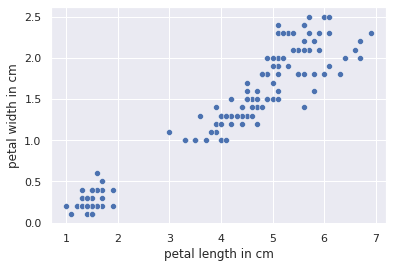

In [42]:
# scatter plot
sns.scatterplot(x='petal length in cm', y='petal width in cm', data=df)

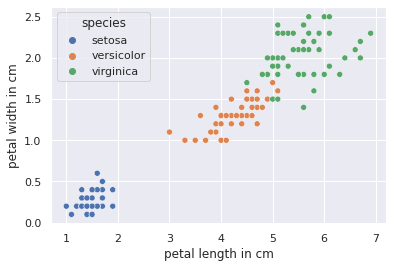

In [43]:
sns.scatterplot(x='petal length in cm', y='petal width in cm',
                hue='species', data=df)

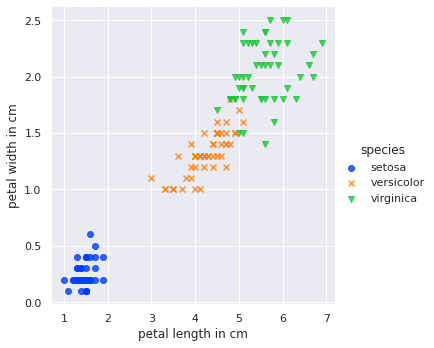

In [44]:
sns.lmplot(x='petal length in cm', y='petal width in cm',
           hue='species', data=df, fit_reg=False,
           palette='bright', markers=['o', 'x', 'v'])

## histogram

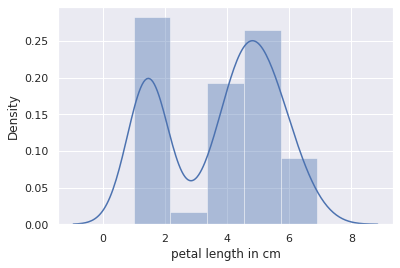

In [49]:
# histogram
sns.distplot(df['petal length in cm'])

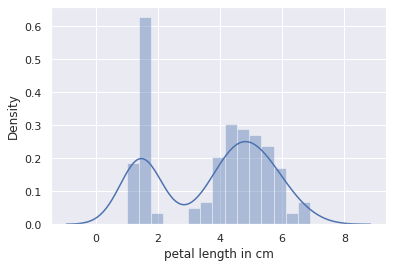

In [50]:
# histogram with 15 bins
sns.distplot(df['petal length in cm'], bins=15)

## Jointplots

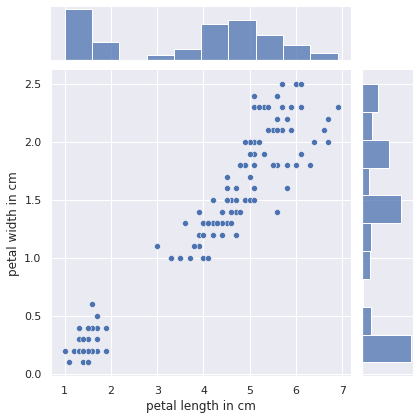

In [51]:
# jointplot
sns.jointplot(x='petal length in cm', y='petal width in cm',
              data=df, kind='scatter', marginal_kws=dict(bins=10))